In [1]:
# import numpy as np
# import scipy.sparse as sp

# # Load the .npz file
# data = np.load('/home/dan/google-research/graph_embedding/dmon/data/cora.npz')

# # Extract the data using the correct keys
# labels = data['labels']
# label_indices = data['label_indices']
# feature_data = data['feature_data']
# feature_indices = data['feature_indices']
# feature_indptr = data['feature_indptr']
# feature_shape = data['feature_shape']
# adj_data = data['adj_data']
# adj_indices = data['adj_indices']
# adj_indptr = data['adj_indptr']
# adj_shape = data['adj_shape']

# # Reconstruct the sparse matrices
# features = sp.csr_matrix((feature_data, feature_indices, feature_indptr), shape=feature_shape)
# adj = sp.csr_matrix((adj_data, adj_indices, adj_indptr), shape=adj_shape)

# print("Adjacency Matrix Shape:", adj.shape)
# print("Feature Matrix Shape:", features.shape)
# print("Labels Shape:", labels.shape)
import pandas as pd

# Load the uploaded CSV file
file_path = '/home/dan/google-research/Aras_transactions.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,factor_id,customers_id,price_purchase,art_name,price_item,BranchCode,date,d_dat,articles_id
0,5,9120623592,220000.0,مگا برگر,83500.0,13813.0,1400-12-21,2022-03-12,1000.0
1,5,9120623592,220000.0,پيتزا چهار فصل,103500.0,13813.0,1400-12-21,2022-03-12,1001.0
2,50,9397257065,158500.0,پيتزا پپروني,88500.0,13813.0,1400-12-23,2022-03-14,1002.0
3,50,9397257065,158500.0,سيب زميني مخصوص,42500.0,13813.0,1400-12-23,2022-03-14,1003.0
4,50,9397257065,158500.0,زيرو قوطي,17400.0,13813.0,1400-12-23,2022-03-14,1004.0


In [2]:
import numpy as np
import scipy.sparse as sp

# Select relevant features for clustering
features = data[['price_purchase', 'price_item']].values

# Convert features to a sparse matrix
feature_matrix = sp.csr_matrix(features)

# Display the feature matrix shape
print("Feature Matrix Shape:", feature_matrix.shape)

Feature Matrix Shape: (3955561, 2)


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a customer-transaction matrix
customer_transaction_matrix = data.pivot_table(index='customers_id', columns='articles_id', values='price_purchase', fill_value=0)

# Compute cosine similarity between customers
similarity_matrix = cosine_similarity(customer_transaction_matrix)

# Convert similarity to an adjacency matrix (threshold or directly use similarity)
threshold = 0.5
adjacency_matrix = (similarity_matrix > threshold).astype(int)
np.fill_diagonal(adjacency_matrix, 0)  # Remove self-loops

# Convert adjacency matrix to a sparse matrix
adjacency_matrix = sp.csr_matrix(adjacency_matrix)

# Display the adjacency matrix shape
print("Adjacency Matrix Shape:", adjacency_matrix.shape)

Adjacency Matrix Shape: (67, 67)


In [3]:
# Remove duplicates to ensure consistent length
data_unique = data.drop_duplicates(subset=['customers_id', 'price_purchase', 'price_item'])

# Extract the features
features = data_unique[['price_purchase', 'price_item']].values

# Convert features to a sparse matrix
import scipy.sparse as sp
feature_matrix = sp.csr_matrix(features)

# Display the feature matrix shape
print("Feature Matrix Shape:", feature_matrix.shape)


Feature Matrix Shape: (3778904, 2)


In [4]:
# Create a customer-transaction matrix (binary indicator)
customer_transaction_matrix = data_unique.pivot_table(index='customers_id', columns='articles_id', values='factor_id', aggfunc='count', fill_value=0)
customer_transaction_matrix = (customer_transaction_matrix > 0).astype(int)

# Display the customer-transaction matrix shape
print("Customer-Transaction Matrix Shape:", customer_transaction_matrix.shape)


Customer-Transaction Matrix Shape: (521706, 340)


In [5]:
customer_transaction_matrix

articles_id,1000.0,1001.0,1002.0,1003.0,1004.0,1005.0,1006.0,1007.0,1008.0,1009.0,...,1378.0,1380.0,1381.0,1382.0,1383.0,1384.0,1385.0,1386.0,1387.0,1388.0
customers_id,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9891223414180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9891917513980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9893029237760,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between customers
similarity_matrix = cosine_similarity(customer_transaction_matrix)

# Convert similarity to an adjacency matrix (threshold or directly use similarity)
threshold = 0.5
adjacency_matrix = (similarity_matrix > threshold).astype(int)
np.fill_diagonal(adjacency_matrix, 0)  # Remove self-loops

# Convert adjacency matrix to a sparse matrix
adjacency_matrix = sp.csr_matrix(adjacency_matrix)

# Display the adjacency matrix shape
print("Adjacency Matrix Shape:", adjacency_matrix.shape)


MemoryError: Unable to allocate 1.98 TiB for an array with shape (521706, 521706) and data type float64

In [14]:
similarity_matrix.shape

(67, 67)

In [31]:
import numpy as np
import scipy.sparse as sp

# Load the existing data
file_path = '/home/dan/google-research/customer_data.npz'
data = np.load(file_path)

# Extract the existing matrices
adjacency_matrix = sp.csr_matrix((data['adj_data'], data['adj_indices'], data['adj_indptr']), shape=data['adj_shape'])
feature_matrix = sp.csr_matrix((data['feature_data'], data['feature_indices'], data['feature_indptr']), shape=data['feature_shape'])

# Verify the dimensions
print("Adjacency Matrix Shape:", adjacency_matrix.shape)
print("Feature Matrix Shape:", feature_matrix.shape)

# Check the rows of the adjacency and feature matrices
print("Number of nodes in Adjacency Matrix:", adjacency_matrix.shape[0])
print("Number of nodes in Feature Matrix:", feature_matrix.shape[0])

# Assume that we want to filter the feature matrix to match the adjacency matrix
if adjacency_matrix.shape[0] < feature_matrix.shape[0]:
    feature_matrix = feature_matrix[:adjacency_matrix.shape[0], :]

# If adjacency matrix has fewer nodes, we need to create a corresponding subgraph or adjust the matrices accordingly.

# Ensure the dimensions match again
assert adjacency_matrix.shape[0] == feature_matrix.shape[0], "Adjacency and feature size must be equal!"

# Generate random labels and label indices with matching dimensions
num_nodes = adjacency_matrix.shape[0]
labels = np.random.randint(0, 2, size=num_nodes)  # Random labels (0 or 1)
label_indices = np.arange(num_nodes)  # Every node has a label

# Save the matrices and labels to a new npz file
np.savez('customer_data_with_labels_corrected.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape,
         feature_data=feature_matrix.data, feature_indices=feature_matrix.indices, feature_indptr=feature_matrix.indptr, feature_shape=feature_matrix.shape,
         labels=labels, label_indices=label_indices)

# Verify loading from the new npz file
data_with_labels = np.load('customer_data_with_labels_corrected.npz', allow_pickle=True)
adjacency_matrix_loaded = sp.csr_matrix((data_with_labels['adj_data'], data_with_labels['adj_indices'], data_with_labels['adj_indptr']), shape=data_with_labels['adj_shape'])
feature_matrix_loaded = sp.csr_matrix((data_with_labels['feature_data'], data_with_labels['feature_indices'], data_with_labels['feature_indptr']), shape=data_with_labels['feature_shape'])
labels_loaded = data_with_labels['labels']
label_indices_loaded = data_with_labels['label_indices']

print("Loaded Adjacency Matrix Shape:", adjacency_matrix_loaded.shape)
print("Loaded Feature Matrix Shape:", feature_matrix_loaded.shape)
print("Loaded Labels Shape:", labels_loaded.shape)
print("Loaded Label Indices Shape:", label_indices_loaded.shape)



Adjacency Matrix Shape: (67, 67)
Feature Matrix Shape: (192, 2)
Number of nodes in Adjacency Matrix: 67
Number of nodes in Feature Matrix: 192
Loaded Adjacency Matrix Shape: (67, 67)
Loaded Feature Matrix Shape: (67, 2)
Loaded Labels Shape: (67,)
Loaded Label Indices Shape: (67,)


In [5]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
from annoy import AnnoyIndex

# Load the uploaded CSV file
file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
print(data.head())

# Remove duplicates to ensure consistent length
data_unique = data.drop_duplicates(subset=['customers_id', 'price_purchase', 'price'])

# Create a customer-transaction matrix (binary indicator)
customer_transaction_matrix = data_unique.pivot_table(index='customers_id', columns='articles_id', values='factor_id', aggfunc='count', fill_value=0)
customer_transaction_matrix = (customer_transaction_matrix > 0).astype(int)

# Display the customer-transaction matrix shape
print("Customer-Transaction Matrix Shape:", customer_transaction_matrix.shape)

# Parameters for Annoy
n_trees = 10  # Number of trees in the Annoy index
num_neighbors = 10  # Number of nearest neighbors to search for each item

# Initialize Annoy index
n_features = customer_transaction_matrix.shape[1]
annoy_index = AnnoyIndex(n_features, 'angular')

# Add items to Annoy index
for i, v in enumerate(customer_transaction_matrix.values):
    annoy_index.add_item(i, v)

# Build the Annoy index
annoy_index.build(n_trees)

# Get nearest neighbors for each item
nearest_neighbors = []
for i in range(annoy_index.get_n_items()):
    neighbors = annoy_index.get_nns_by_item(i, num_neighbors)
    nearest_neighbors.append(neighbors)

# Create an adjacency matrix based on nearest neighbors
adjacency_matrix = np.zeros((len(nearest_neighbors), len(nearest_neighbors)))

for i, neighbors in enumerate(nearest_neighbors):
    for neighbor in neighbors:
        adjacency_matrix[i, neighbor] = 1

adjacency_matrix = sp.csr_matrix(adjacency_matrix)

# Display the adjacency matrix shape
print("Adjacency Matrix Shape:", adjacency_matrix.shape)

# Extract the features
features = data_unique[['price_purchase', 'price']].drop_duplicates().values

# Convert features to a sparse matrix
feature_matrix = sp.csr_matrix(features)

# Display the feature matrix shape
print("Feature Matrix Shape:", feature_matrix.shape)

# Ensure the dimensions match
num_nodes_adj = adjacency_matrix.shape[0]
num_nodes_feat = feature_matrix.shape[0]

if num_nodes_adj < num_nodes_feat:
    feature_matrix = feature_matrix[:num_nodes_adj, :]
elif num_nodes_adj > num_nodes_feat:
    raise ValueError("Feature matrix has fewer nodes than adjacency matrix. Adjust your data preprocessing.")

# Ensure the dimensions match again
assert adjacency_matrix.shape[0] == feature_matrix.shape[0], "Adjacency and feature size must be equal!"

# Generate random labels and label indices with matching dimensions
num_nodes = adjacency_matrix.shape[0]
labels = np.random.randint(0, 2, size=num_nodes)  # Random labels (0 or 1)
label_indices = np.arange(num_nodes)  # Every node has a label

# Save the matrices and labels to a new npz file
np.savez('customer_burger.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape,
         feature_data=feature_matrix.data, feature_indices=feature_matrix.indices, feature_indptr=feature_matrix.indptr, feature_shape=feature_matrix.shape,
         labels=labels, label_indices=label_indices)

# Verify loading from the new npz file
data_with_labels = np.load('customer_burger.npz', allow_pickle=True)
adjacency_matrix_loaded = sp.csr_matrix((data_with_labels['adj_data'], data_with_labels['adj_indices'], data_with_labels['adj_indptr']), shape=data_with_labels['adj_shape'])
feature_matrix_loaded = sp.csr_matrix((data_with_labels['feature_data'], data_with_labels['feature_indices'], data_with_labels['feature_indptr']), shape=data_with_labels['feature_shape'])
labels_loaded = data_with_labels['labels']
label_indices_loaded = data_with_labels['label_indices']

print("Loaded Adjacency Matrix Shape:", adjacency_matrix_loaded.shape)
print("Loaded Feature Matrix Shape:", feature_matrix_loaded.shape)
print("Loaded Labels Shape:", labels_loaded.shape)
print("Loaded Label Indices Shape:", label_indices_loaded.shape)


   factor_id  customers_id  price_purchase      art_name   branch        date  \
0        322    9123006834        452500.0  اسپرايت قوطي  13813.0  2022-03-28   
1        949    9127030430         96500.0  اسپرايت قوطي  13811.0  2020-09-21   
2       1082    9122174915        136000.0  اسپرايت قوطي  13811.0  2020-09-26   
3       1109    9122174915        218000.0  اسپرايت قوطي  13811.0  2020-09-26   
4       1866    9122174915        109000.0  اسپرايت قوطي  13811.0  2020-10-18   

   articles_id  target  group    price  
0       1023.0       1      3  19500.0  
1       1023.0       1      3  19500.0  
2       1023.0       1      3  19500.0  
3       1023.0       1      3  19500.0  
4       1023.0       1      3  19500.0  
Customer-Transaction Matrix Shape: (25331, 322)
Adjacency Matrix Shape: (25331, 25331)
Feature Matrix Shape: (139921, 2)
Loaded Adjacency Matrix Shape: (25331, 25331)
Loaded Feature Matrix Shape: (25331, 2)
Loaded Labels Shape: (25331,)
Loaded Label Indices Shape: (2

In [10]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
from annoy import AnnoyIndex
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from datetime import datetime

# Load the uploaded CSV file
file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
print(data.head())

# Remove duplicates to ensure consistent length
data_unique = data.drop_duplicates(subset=['customers_id', 'price_purchase', 'price', 'group', 'branch', 'date'])

# Convert the date column to datetime
data_unique['date'] = pd.to_datetime(data_unique['date'], errors='coerce', infer_datetime_format=True)

# Extract features from the date column
data_unique['day_of_week'] = data_unique['date'].dt.dayofweek
data_unique['month'] = data_unique['date'].dt.month

# One-hot encode categorical features
categorical_features = ['group', 'branch', 'day_of_week', 'month']
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_features = encoder.fit_transform(data_unique[categorical_features])

# Extract and normalize numerical features
numerical_features = data_unique[['price_purchase', 'price']].values
scaler = StandardScaler()
normalized_numerical_features = scaler.fit_transform(numerical_features)

# Combine normalized numerical and encoded categorical features
features = np.hstack([normalized_numerical_features, encoded_categorical_features])

# Convert features to a sparse matrix
feature_matrix = sp.csr_matrix(features)

# Create a customer-transaction matrix (binary indicator)
customer_transaction_matrix = data_unique.pivot_table(index='customers_id', columns='articles_id', values='factor_id', aggfunc='count', fill_value=0)
customer_transaction_matrix = (customer_transaction_matrix > 0).astype(int)

# Display the customer-transaction matrix shape
print("Customer-Transaction Matrix Shape:", customer_transaction_matrix.shape)

# Parameters for Annoy
n_trees = 10  # Number of trees in the Annoy index
num_neighbors = 10  # Number of nearest neighbors to search for each item

# Initialize Annoy index
n_features = customer_transaction_matrix.shape[1]
annoy_index = AnnoyIndex(n_features, 'angular')

# Add items to Annoy index
for i, v in enumerate(customer_transaction_matrix.values):
    annoy_index.add_item(i, v)

# Build the Annoy index
annoy_index.build(n_trees)

# Get nearest neighbors for each item
nearest_neighbors = []
for i in range(annoy_index.get_n_items()):
    neighbors = annoy_index.get_nns_by_item(i, num_neighbors)
    nearest_neighbors.append(neighbors)

# Create an adjacency matrix based on nearest neighbors
adjacency_matrix = np.zeros((len(nearest_neighbors), len(nearest_neighbors)))

for i, neighbors in enumerate(nearest_neighbors):
    for neighbor in neighbors:
        adjacency_matrix[i, neighbor] = 1

adjacency_matrix = sp.csr_matrix(adjacency_matrix)

# Display the adjacency matrix shape
print("Adjacency Matrix Shape:", adjacency_matrix.shape)

# Ensure the dimensions match
num_nodes_adj = adjacency_matrix.shape[0]
num_nodes_feat = feature_matrix.shape[0]

if num_nodes_adj < num_nodes_feat:
    feature_matrix = feature_matrix[:num_nodes_adj, :]
elif num_nodes_adj > num_nodes_feat:
    raise ValueError("Feature matrix has fewer nodes than adjacency matrix. Adjust your data preprocessing.")

# Ensure the dimensions match again
assert adjacency_matrix.shape[0] == feature_matrix.shape[0], "Adjacency and feature size must be equal!"

# Generate random labels and label indices with matching dimensions
num_nodes = adjacency_matrix.shape[0]
labels = np.random.randint(0, 2, size=num_nodes)  # Random labels (0 or 1)
label_indices = np.arange(num_nodes)  # Every node has a label

# Save the matrices and labels to a new npz file
np.savez('customer_burger.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape,
         feature_data=feature_matrix.data, feature_indices=feature_matrix.indices, feature_indptr=feature_matrix.indptr, feature_shape=feature_matrix.shape,
         labels=labels, label_indices=label_indices)

# Verify loading from the new npz file
data_with_labels = np.load('customer_burger.npz', allow_pickle=True)
adjacency_matrix_loaded = sp.csr_matrix((data_with_labels['adj_data'], data_with_labels['adj_indices'], data_with_labels['adj_indptr']), shape=data_with_labels['adj_shape'])
feature_matrix_loaded = sp.csr_matrix((data_with_labels['feature_data'], data_with_labels['feature_indices'], data_with_labels['feature_indptr']), shape=data_with_labels['feature_shape'])
labels_loaded = data_with_labels['labels']
label_indices_loaded = data_with_labels['label_indices']

print("Loaded Adjacency Matrix Shape:", adjacency_matrix_loaded.shape)
print("Loaded Feature Matrix Shape:", feature_matrix_loaded.shape)
print("Loaded Labels Shape:", labels_loaded.shape)
print("Loaded Label Indices Shape:", label_indices_loaded.shape)


   factor_id  customers_id  price_purchase      art_name   branch        date  \
0        322    9123006834        452500.0  اسپرايت قوطي  13813.0  2022-03-28   
1        949    9127030430         96500.0  اسپرايت قوطي  13811.0  2020-09-21   
2       1082    9122174915        136000.0  اسپرايت قوطي  13811.0  2020-09-26   
3       1109    9122174915        218000.0  اسپرايت قوطي  13811.0  2020-09-26   
4       1866    9122174915        109000.0  اسپرايت قوطي  13811.0  2020-10-18   

   articles_id  target  group    price  
0       1023.0       1      3  19500.0  
1       1023.0       1      3  19500.0  
2       1023.0       1      3  19500.0  
3       1023.0       1      3  19500.0  
4       1023.0       1      3  19500.0  


/tmp/ipykernel_16752/1390881480.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_unique['date'] = pd.to_datetime(data_unique['date'], errors='coerce', infer_datetime_format=True)
/tmp/ipykernel_16752/1390881480.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique['date'] = pd.to_datetime(data_unique['date'], errors='coerce', infer_datetime_format=True)
/tmp/ipykernel_16752/1390881480.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Customer-Transaction Matrix Shape: (25331, 322)
Adjacency Matrix Shape: (25331, 25331)
Loaded Adjacency Matrix Shape: (25331, 25331)
Loaded Feature Matrix Shape: (25331, 54)
Loaded Labels Shape: (25331,)
Loaded Label Indices Shape: (25331,)


In [ ]:
# Load cluster assignments
cluster_assignments = np.load('cluster_assignments.npy')

# Ensure the order of customers_id matches the order of cluster assignments
data_unique = data_unique.sort_values(by='customers_id').reset_index(drop=True)
cluster_assignments_df = pd.DataFrame({'customers_id': data_unique['customers_id'], 'cluster': cluster_assignments})

# Display the cluster assignments
print(cluster_assignments_df.head())

# Save the cluster assignments to a CSV file
cluster_assignments_df.to_csv('customer_cluster_assignments.csv', index=False)

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import scipy.sparse as sp

# Load your data
file_path = '/home/dan/google-research/test.csv'
data = pd.read_csv(file_path)

# Ensure date is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Convert date to timestamp
data['timestamp'] = data['date'].astype(np.int64) // 10**9

# Sort data by customers and date
data = data.sort_values(by=['customers_id', 'date'])

# Extract unique customers and articles
unique_customers = data['customers_id'].unique()
unique_articles = data['articles_id'].unique()

# Extract features from the date column
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month

# One-hot encode categorical features
categorical_features = ['group', 'branch', 'day_of_week', 'month']
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_features = encoder.fit_transform(data[categorical_features])

# Extract numerical features
numerical_features = ['price_purchase', 'price']
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(data[numerical_features])

# Combine all features
features = np.hstack([encoded_categorical_features, scaled_numerical_features])


In [27]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime
# Load your data
file_path = '/home/dan/google-research/test.csv'
data = pd.read_csv(file_path)

# Ensure date is in datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Calculate RFM features
# Recency
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'Last_Purchase_Date']
last_purchase_date['Recency'] = (data['date'].max() - last_purchase_date['Last_Purchase_Date']).dt.days

# Frequency
frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'Frequency']

# Monetary
monetary = data.groupby('customers_id')['price_purchase'].sum().reset_index()
monetary.columns = ['customers_id', 'Monetary']

# Merge RFM features
rfm = last_purchase_date.merge(frequency, on='customers_id').merge(monetary, on='customers_id')
rfm = rfm[['customers_id', 'Recency', 'Frequency', 'Monetary']]

# Normalize RFM features
rfm['Recency'] = (rfm['Recency'] - rfm['Recency'].min()) / (rfm['Recency'].max() - rfm['Recency'].min())
rfm['Frequency'] = (rfm['Frequency'] - rfm['Frequency'].min()) / (rfm['Frequency'].max() - rfm['Frequency'].min())
rfm['Monetary'] = (rfm['Monetary'] - rfm['Monetary'].min()) / (rfm['Monetary'].max() - rfm['Monetary'].min())

# Create customer-item matrix
customer_item_matrix = data.pivot_table(index='customers_id', columns='articles_id', values='price_purchase', fill_value=0)
customer_item_matrix = (customer_item_matrix > 0).astype(int)

def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    TL = max_time
    return np.sqrt(np.exp(-lambda_val * (TL - t_ui) / TL) * np.exp(-lambda_val * (TL - t_vi) / TL))

# Create adjacency matrix efficiently
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute unique dates
unique_dates = data['date'].unique()

# Normalize timestamps
data['timestamp'] = data['date'].map(pd.Timestamp.timestamp)
max_time = (data['timestamp'].max() - data['timestamp'].min())

for date in unique_dates:
    subset = data[data['date'] == date]
    for i, u in subset.iterrows():
        idx_u = customer_index[u['customers_id']]
        articles_u = data[data['customers_id'] == u['customers_id']]
        t_ui = u['timestamp']
        for j, v in subset.iterrows():
            if i >= j:
                continue
            idx_v = customer_index[v['customers_id']]
            articles_v = data[data['customers_id'] == v['customers_id']]
            t_vi = v['timestamp']
            common_articles = pd.merge(articles_u, articles_v, on='articles_id', suffixes=('_u', '_v'))
            if len(common_articles) == 0:
                continue

            tw = time_weight(t_ui, t_vi, max_time)
            numerator = len(common_articles) * tw  # Number of common articles
            denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw  # Product of the number of articles bought by u and v
            if denominator > 0:
                adjacency_matrix[idx_u, idx_v] = numerator / denominator
                adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]


adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
print("Adjacency Matrix:")
print(adjacency_matrix.toarray())

# Prepare RFM feature matrix
feature_matrix = rfm[['Recency', 'Frequency', 'Monetary']].values
feature_matrix = csr_matrix(feature_matrix)

# Print feature matrix
print("Feature Matrix:")
print(feature_matrix.toarray())

# Save the adjacency matrix and feature matrix
np.savez('customer_rfm_data.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape,
         feature_data=feature_matrix.data, feature_indices=feature_matrix.indices, feature_indptr=feature_matrix.indptr, feature_shape=feature_matrix.shape)

# Verify loading from the new npz file
data_with_labels = np.load('customer_rfm_data.npz', allow_pickle=True)
adjacency_matrix_loaded = csr_matrix((data_with_labels['adj_data'], data_with_labels['adj_indices'], data_with_labels['adj_indptr']), shape=data_with_labels['adj_shape'])
feature_matrix_loaded = csr_matrix((data_with_labels['feature_data'], data_with_labels['feature_indices'], data_with_labels['feature_indptr']), shape=data_with_labels['feature_shape'])

print("Loaded Adjacency Matrix Shape:", adjacency_matrix_loaded.shape)
print("Loaded Feature Matrix Shape:", feature_matrix_loaded.shape)

Adjacency Matrix:
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 28. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Feature Matrix:
[[0.94215938 0.         0.0219414 ]
 [0.97000857 0.         0.00999861]
 [0.99657241 0.03703704 0.01388696]
 ...
 [0.09211654 0.         0.08929315]
 [0.54241645 0.         0.02652409]
 [0.         0.11111111 0.22413554]]
Loaded Adjacency Matrix Shape: (527, 527)
Loaded Feature Matrix Shape: (527, 3)


In [33]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime
# Load your data
file_path = '/home/dan/google-research/test.csv'
data = pd.read_csv(file_path)

# Convert date to datetime and then to timestamp
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data['timestamp'] = data['date'].map(datetime.timestamp)

# Normalize timestamps
max_time = data['timestamp'].max()

# Create time-weight function based on the provided formula
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui)) * np.exp(-lambda_val * (max_time - t_vi)))

# Normalize timestamps
data['timestamp'] = data['date'].apply(lambda x: datetime.timestamp(pd.to_datetime(x)))
max_time = data['timestamp'].max()

# Create adjacency matrix efficiently
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

for idx_u, u in data.iterrows():
    customer_u = u['customers_id']
    articles_u = data[data['customers_id'] == customer_u]
    t_ui = u['timestamp']
    for idx_v, v in data.iterrows():
        if idx_u >= idx_v:
            continue
        customer_v = v['customers_id']
        articles_v = data[data['customers_id'] == customer_v]
        t_vi = v['timestamp']
        common_articles = pd.merge(articles_u, articles_v, on='articles_id', suffixes=('_u', '_v'))
        if len(common_articles) == 0:
            continue

        tw = time_weight(t_ui, t_vi, max_time)
        numerator = len(common_articles) * tw  # Number of common articles
        denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw  # Product of the number of articles bought by u and v

        if denominator > 0:
            adjacency_matrix[customer_index[customer_u], customer_index[customer_v]] = numerator / denominator
            adjacency_matrix[customer_index[customer_v], customer_index[customer_u]] = adjacency_matrix[customer_index[customer_u], customer_index[customer_v]]

# Normalize adjacency matrix values between 0 and 1
# adjacency_matrix = adjacency_matrix / adjacency_matrix.max()
adjacency_matrix = csr_matrix(adjacency_matrix)

# Print non-zero values in adjacency matrix
non_zero_indices = adjacency_matrix.nonzero()
row_indices = non_zero_indices[0].tolist()
col_indices = non_zero_indices[1].tolist()
non_zero_values = adjacency_matrix.data.tolist()

non_zero_elements = list(zip(row_indices, col_indices, non_zero_values))
print("Non-zero elements (row, column, value):")
for element in non_zero_elements:
    print(element)

# Print adjacency matrix
print("Adjacency Matrix:\n", adjacency_matrix.toarray())

# Save adjacency matrix
np.savez('adjacency_matrix.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape)

# Generate RFM features
# Recency
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'last_purchase_date']
current_date = data['date'].max()
last_purchase_date['recency'] = (current_date - last_purchase_date['last_purchase_date']).dt.days

# Frequency
frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'frequency']

# Monetary
monetary = data.groupby('customers_id')['price'].sum().reset_index()
monetary.columns = ['customers_id', 'monetary']

# Combine RFM features
rfm = pd.merge(last_purchase_date[['customers_id', 'recency']], frequency, on='customers_id')
rfm = pd.merge(rfm, monetary, on='customers_id')

# Normalize RFM features
rfm['recency'] = (rfm['recency'] - rfm['recency'].min()) / (rfm['recency'].max() - rfm['recency'].min())
rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min()) / (rfm['frequency'].max() - rfm['frequency'].min())
rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min()) / (rfm['monetary'].max() - rfm['monetary'].min())

# Convert RFM features to a sparse matrix
rfm_matrix = csr_matrix(rfm[['recency', 'frequency', 'monetary']].values)

# Save RFM features
np.savez('rfm_features.npz', 
         feature_data=rfm_matrix.data, feature_indices=rfm_matrix.indices, feature_indptr=rfm_matrix.indptr, feature_shape=rfm_matrix.shape)

# Print RFM features
print("RFM Features:\n", rfm)

Non-zero elements (row, column, value):
(280, 464, 2.82842712474619)
(280, 508, 2.0)
(464, 280, 2.82842712474619)
(464, 508, 1.414213562373095)
(508, 280, 2.0)
(508, 464, 1.414213562373095)
Adjacency Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
RFM Features:
      customers_id   recency  frequency  monetary
0        22000201  0.942159   0.000000  0.000000
1        22000604  0.970009   0.000000  0.000000
2        22009616  0.996572   0.037037  0.037037
3        22019832  0.970437   0.037037  0.037037
4        22044882  0.870608   0.000000  0.000000
..            ...       ...        ...       ...
522    9912069693  0.194944   0.000000  0.000000
523    9912773025  0.493145   0.000000  0.000000
524    9912790161  0.092117   0.000000  0.000000
525    9913882048  0.542416   0.000000  0.000000
526    9915400271  0.000000   0.111111  0.111111

[527 rows x 4 columns]


In [35]:
# Normalize timestamps
data['timestamp'] = data['date'].apply(lambda x: datetime.timestamp(pd.to_datetime(x)))
max_time = data['timestamp'].max()

# Create time-weight function
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui) / max_time) * np.exp(-lambda_val * (max_time - t_vi) / max_time))

# Create the adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute articles per customer
articles_per_customer = {customer: set(data[data['customers_id'] == customer]['articles_id']) for customer in customers}

# Precompute timestamps per customer
timestamps_per_customer = {customer: data[data['customers_id'] == customer]['timestamp'].values for customer in customers}

for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw = time_weight(np.mean(t_ui), np.mean(t_vi), max_time)
        numerator = len(common_articles) * tw
        denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]

# Normalize adjacency matrix values between 0 and 1
adjacency_matrix = adjacency_matrix / adjacency_matrix.max()

adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
print("Adjacency Matrix:", adjacency_matrix)
print("Non-zero entries:", adjacency_matrix.nnz)

Adjacency Matrix:   (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 11)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 14)	1.0
  (0, 15)	1.0
  (0, 16)	1.0
  (0, 17)	1.0
  (0, 18)	1.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 23)	1.0
  (0, 24)	1.0
  (0, 25)	1.0
  :	:
  (526, 501)	1.0
  (526, 502)	1.0
  (526, 503)	1.0
  (526, 504)	1.0
  (526, 505)	1.0
  (526, 506)	1.0
  (526, 507)	1.0
  (526, 508)	1.0
  (526, 509)	1.0
  (526, 510)	1.0
  (526, 511)	1.0
  (526, 512)	1.0
  (526, 513)	1.0
  (526, 514)	1.0
  (526, 515)	1.0
  (526, 516)	1.0
  (526, 517)	1.0
  (526, 518)	1.0
  (526, 519)	1.0
  (526, 520)	1.0
  (526, 521)	1.0
  (526, 522)	1.0
  (526, 523)	1.0
  (526, 524)	1.0
  (526, 525)	1.0
Non-zero entries: 277202


In [6]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime
file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Set a random seed for reproducibility
random_state = 42
np.random.seed(random_state)

customer_ids = data['customers_id'].unique()
train_size = int(0.8 * len(customer_ids))

# Shuffle customer IDs
np.random.shuffle(customer_ids)

# Split into two sets
part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

# Create dataframes for each part
part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]

# Normalize timestamps
data['timestamp'] = data['date'].apply(lambda x: datetime.timestamp(pd.to_datetime(x)))
max_time = data['timestamp'].max()

# Create time-weight function
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui) / max_time) * np.exp(-lambda_val * (max_time - t_vi) / max_time))

# Create the adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute articles per customer
articles_per_customer = {customer: set(data[data['customers_id'] == customer]['articles_id']) for customer in customers}

# Precompute timestamps per customer
timestamps_per_customer = {customer: data[data['customers_id'] == customer]['timestamp'].values for customer in customers}

for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw = time_weight(np.mean(t_ui), np.mean(t_vi), max_time)
        numerator = len(common_articles) * tw
        denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]

# Normalize adjacency matrix values between 0 and 1
adjacency_matrix = adjacency_matrix / adjacency_matrix.max()

adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)


Adjacency Matrix (Dense Format):
[[0.         0.25819889 0.50262469 ... 0.09128709 0.         0.12909944]
 [0.25819889 0.         0.40555355 ... 0.         0.         0.        ]
 [0.50262469 0.40555355 0.         ... 0.         0.         0.        ]
 ...
 [0.09128709 0.         0.         ... 0.         0.         0.35355339]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12909944 0.         0.         ... 0.35355339 0.         0.        ]]


In [4]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime

# Load data
file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Set a random seed for reproducibility
random_state = 42
np.random.seed(random_state)

# Split data into parts
customer_ids = data['customers_id'].unique()
train_size = int(0.8 * len(customer_ids))
np.random.shuffle(customer_ids)

part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]

# Normalize timestamps
data['timestamp'] = pd.to_datetime(data['date']).map(datetime.timestamp)
max_time = data['timestamp'].max()

# Create time-weight function
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui) / max_time) * np.exp(-lambda_val * (max_time - t_vi) / max_time))

# Create adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute articles per customer and timestamps
articles_per_customer = data.groupby('customers_id')['articles_id'].apply(set).to_dict()
timestamps_per_customer = data.groupby('customers_id')['timestamp'].apply(np.mean).to_dict()

# Vectorize the adjacency matrix creation
for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        
        common_articles = articles_u & articles_v  # Intersection of sets

        if not common_articles:
            continue

        tw = time_weight(t_ui, t_vi, max_time)
        numerator = len(common_articles) * tw
        denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = numerator / denominator

# Normalize adjacency matrix values between 0 and 1
adjacency_matrix /= adjacency_matrix.max()

adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)


Adjacency Matrix (Dense Format):
[[0.         0.25819889 0.50262469 ... 0.09128709 0.         0.12909944]
 [0.25819889 0.         0.40555355 ... 0.         0.         0.        ]
 [0.50262469 0.40555355 0.         ... 0.         0.         0.        ]
 ...
 [0.09128709 0.         0.         ... 0.         0.         0.35355339]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12909944 0.         0.         ... 0.35355339 0.         0.        ]]


In [7]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime

# Load data
file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Set a random seed for reproducibility
random_state = 42
np.random.seed(random_state)

# Split data into parts
customer_ids = data['customers_id'].unique()
train_size = int(0.8 * len(customer_ids))
np.random.shuffle(customer_ids)

part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]

# Normalize timestamps
data['timestamp'] = pd.to_datetime(data['date']).map(datetime.timestamp)
max_time = data['timestamp'].max()

# Calculate RFM features
# Recency
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'last_purchase_date']
last_purchase_date['recency'] = (pd.to_datetime(data['date'].max()) - pd.to_datetime(last_purchase_date['last_purchase_date'])).dt.days

# Frequency
frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'frequency']

# Monetary
monetary = data.groupby('customers_id')['price_purchase'].sum().reset_index()
monetary.columns = ['customers_id', 'monetary']

# Merge RFM features
rfm = last_purchase_date.merge(frequency, on='customers_id').merge(monetary, on='customers_id')

# Normalize RFM features
rfm['recency'] = (rfm['recency'] - rfm['recency'].min()) / (rfm['recency'].max() - rfm['recency'].min())
rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min()) / (rfm['frequency'].max() - rfm['frequency'].min())
rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min()) / (rfm['monetary'].max() - rfm['monetary'].min())

# Create RFM feature matrix
rfm_features = rfm[['recency', 'frequency', 'monetary']].values
feature_matrix = csr_matrix(rfm_features)

# Create time-weight function
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui) / max_time) * np.exp(-lambda_val * (max_time - t_vi) / max_time))

# Create adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute articles per customer and timestamps
articles_per_customer = data.groupby('customers_id')['articles_id'].apply(set).to_dict()
timestamps_per_customer = data.groupby('customers_id')['timestamp'].apply(np.mean).to_dict()

for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw = time_weight(t_ui, t_vi, max_time)
        numerator = len(common_articles) * tw
        denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = numerator / denominator

# Normalize adjacency matrix values between 0 and 1
adjacency_matrix = adjacency_matrix / adjacency_matrix.max()

adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)

# Save the matrices and labels to a new npz file
np.savez('customer_burger1.npz', 
         adj_data=adjacency_matrix.data, adj_indices=adjacency_matrix.indices, adj_indptr=adjacency_matrix.indptr, adj_shape=adjacency_matrix.shape,
         feature_data=feature_matrix.data, feature_indices=feature_matrix.indices, feature_indptr=feature_matrix.indptr, feature_shape=feature_matrix.shape)


Adjacency Matrix (Dense Format):
[[0.         0.25819889 0.50262469 ... 0.09128709 0.         0.12909944]
 [0.25819889 0.         0.40555355 ... 0.         0.         0.        ]
 [0.50262469 0.40555355 0.         ... 0.         0.         0.        ]
 ...
 [0.09128709 0.         0.         ... 0.         0.         0.35355339]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12909944 0.         0.         ... 0.35355339 0.         0.        ]]


In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime

file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Define a list of articles_id to exclude
exclude_articles = [1004, 1007, 1008, 1019, 1020, 1023, 1024, 1031, 1032, 1044, 1045, 1048, 1055, 1058, 1063, 1064, 1067, 1070, 1071, 1072, 1092, 1093, 1094, 1095, 1098, 1099, 1102, 1110, 1111, 1112, 1116, 1122, 1125, 1132, 1142, 1153, 1156, 1163, 1165, 1170, 1175, 1179, 1184, 1186, 1188, 1196, 1198, 1213, 1229, 1242, 1269, 1275, 1279, 1283, 1284, 1285, 1293, 1308, 1312, 1316, 1317, 1319, 1326, 1330, 1332, 1333, 1334, 1335, 1336, 1337, 1339, 1344, 1345, 1346, 1363, 1366, 1378, 1380, 1382, 1383, 1388]

# Split the data
customer_ids = data['customers_id'].unique()
train_size = int(0.9 * len(customer_ids))

# Shuffle customer IDs with a random state for reproducibility
np.random.seed(1)
np.random.shuffle(customer_ids)

# Split into two sets
part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

# Create dataframes for each part
part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]
data.to_csv('/home/dan/DMon/graph_embedding/dmon/data/data.csv', index=False)
# Normalize timestamps
data['timestamp'] = pd.to_datetime(data['date']).map(datetime.timestamp)
max_time = data['timestamp'].max()

# Calculate RFM features
# Recency
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'last_purchase_date']
last_purchase_date['recency'] = (pd.to_datetime(data['date'].max()) - pd.to_datetime(last_purchase_date['last_purchase_date'])).dt.days

# Frequency
frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'frequency']

# Monetary
monetary = data.groupby('customers_id')['price_purchase'].sum().reset_index()
monetary.columns = ['customers_id', 'monetary']

# Merge RFM features
rfm = last_purchase_date.merge(frequency, on='customers_id').merge(monetary, on='customers_id')

# Normalize RFM features
rfm['recency'] = (rfm['recency'] - rfm['recency'].min()) / (rfm['recency'].max() - rfm['recency'].min())
rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min()) / (rfm['frequency'].max() - rfm['frequency'].min())
rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min()) / (rfm['monetary'].max() - rfm['monetary'].min())

# Create RFM feature matrix
rfm_features = rfm[['recency', 'frequency', 'monetary']].values
feature_matrix = csr_matrix(rfm_features)


# Create time-weight function
# def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
#     return np.sqrt(np.exp(-lambda_val * (max_time - t_ui) / max_time) * np.exp(-lambda_val * (max_time - t_vi) / max_time))
def time_weight(t_ui, t_vi, max_time, lambda_val=0.5):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui)) * np.exp(-lambda_val * (max_time - t_vi)))

# Create the adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Precompute articles per customer excluding the specified articles
articles_per_customer = {
    customer: set(data[(data['customers_id'] == customer) & (~data['articles_id'].isin(exclude_articles))]['articles_id']) 
    for customer in customers
}

# Precompute timestamps per customer
timestamps_per_customer = {customer: data[data['customers_id'] == customer][['articles_id', 'timestamp']].values for customer in customers}

for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw_sum = sum(time_weight(tu[1], tv[1], max_time) for tu in t_ui for tv in t_vi if tu[0] == tv[0])
        numerator = tw_sum
        denominator = np.sqrt(len(articles_u)**2 + len(articles_v)**2)

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]


# # Create the adjacency matrix
# customers = data['customers_id'].unique()
# customer_index = {customer: idx for idx, customer in enumerate(customers)}
# n_customers = len(customers)
# adjacency_matrix = np.zeros((n_customers, n_customers))

# # Precompute articles per customer excluding the specified articles
# articles_per_customer = {
#     customer: set(data[(data['customers_id'] == customer) & (~data['articles_id'].isin(exclude_articles))]['articles_id']) 
#     for customer in customers
# }

# # Precompute timestamps per customer
# timestamps_per_customer = {customer: data[data['customers_id'] == customer]['timestamp'].values for customer in customers}

# for idx_u, customer_u in enumerate(customers):
#     articles_u = articles_per_customer[customer_u]
#     t_ui = timestamps_per_customer[customer_u]
#     for idx_v, customer_v in enumerate(customers):
#         if idx_u >= idx_v:
#             continue
#         articles_v = articles_per_customer[customer_v]
#         t_vi = timestamps_per_customer[customer_v]
#         common_articles = articles_u.intersection(articles_v)

#         if len(common_articles) == 0:
#             continue

#         # tw = time_weight(np.mean(t_ui), np.mean(t_vi), max_time)
#         tw = time_weight(t_ui, t_vi, max_time)        
#         numerator = len(common_articles) * tw
#         denominator = np.sqrt(len(articles_u) * len(articles_v)) * tw

#         if denominator > 0:
#             adjacency_matrix[idx_u, idx_v] = numerator / denominator
#             adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]

# Normalize adjacency matrix values between 0 and 1
adjacency_matrix = adjacency_matrix / adjacency_matrix.max()

adjacency_matrix = csr_matrix(adjacency_matrix)

# Print adjacency matrix
dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)

# Save the matrices and labels to a new npz file
np.savez_compressed('/home/dan/DMon/graph_embedding/dmon/data/customer_burger_compressed.npz',
                    adj_data=adjacency_matrix.data.astype(np.float32),
                    adj_indices=adjacency_matrix.indices.astype(np.int32),
                    adj_indptr=adjacency_matrix.indptr.astype(np.int32),
                    adj_shape=adjacency_matrix.shape,
                    feature_data=feature_matrix.data.astype(np.float32),
                    feature_indices=feature_matrix.indices.astype(np.int32),
                    feature_indptr=feature_matrix.indptr.astype(np.int32),
                    feature_shape=feature_matrix.shape)

print("Data saved in compressed format.")


Adjacency Matrix (Dense Format):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Data saved in compressed format.


In [12]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime

file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Define a list of articles_id to exclude
exclude_articles = set([1004, 1007, 1008, 1019, 1020, 1023, 1024, 1031, 1032, 1044, 1045, 1048, 1055, 1058, 1063, 1064, 1067, 1070, 1071, 1072, 1092, 1093, 1094, 1095, 1098, 1099, 1102, 1110, 1111, 1112, 1116, 1122, 1125, 1132, 1142, 1153, 1156, 1163, 1165, 1170, 1175, 1179, 1184, 1186, 1188, 1196, 1198, 1213, 1229, 1242, 1269, 1275, 1279, 1283, 1284, 1285, 1293, 1308, 1312, 1316, 1317, 1319, 1326, 1330, 1332, 1333, 1334, 1335, 1336, 1337, 1339, 1344, 1345, 1346, 1363, 1366, 1378, 1380, 1382, 1383, 1388])

# Split the data
customer_ids = data['customers_id'].unique()
train_size = int(0.95 * len(customer_ids))

# Shuffle customer IDs with a random state for reproducibility
np.random.seed(1)
np.random.shuffle(customer_ids)

# Split into two sets
part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

# Create dataframes for each part
part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]
data.to_csv('/home/dan/DMon/graph_embedding/dmon/data/data.csv', index=False)
# Normalize timestamps
data['timestamp'] = pd.to_datetime(data['date']).map(datetime.timestamp)
max_time = data['timestamp'].max()

# Calculate RFM features
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'last_purchase_date']
last_purchase_date['recency'] = (pd.to_datetime(data['date'].max()) - pd.to_datetime(last_purchase_date['last_purchase_date'])).dt.days

frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'frequency']

monetary = data.groupby('customers_id')['price_purchase'].sum().reset_index()
monetary.columns = ['customers_id', 'monetary']

rfm = last_purchase_date.merge(frequency, on='customers_id').merge(monetary, on='customers_id')

rfm['recency'] = (rfm['recency'] - rfm['recency'].min()) / (rfm['recency'].max() - rfm['recency'].min())
rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min()) / (rfm['frequency'].max() - rfm['frequency'].min())
rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min()) / (rfm['monetary'].max() - rfm['monetary'].min())

rfm_features = rfm[['recency', 'frequency', 'monetary']].values
feature_matrix = csr_matrix(rfm_features)

# Precompute time weights
def time_weight(t_ui, t_vi, max_time, lambda_val=0.001):
    return np.sqrt(np.exp(-lambda_val * (max_time - t_ui)) * np.exp(-lambda_val * (max_time - t_vi)))

# Precompute articles and timestamps per customer
filtered_data = data[~data['articles_id'].isin(exclude_articles)]
articles_per_customer = {customer: set(filtered_data[filtered_data['customers_id'] == customer]['articles_id']) for customer in customer_ids}
timestamps_per_customer = {customer: filtered_data[filtered_data['customers_id'] == customer][['articles_id', 'timestamp']].values for customer in customer_ids}

# Create adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers))

# Optimized computation
for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw_sum = np.sum([time_weight(tu[1], tv[1], max_time) for tu in t_ui for tv in t_vi if tu[0] == tv[0]])
        numerator = tw_sum
        denominator = np.sqrt(len(articles_u)**2 + len(articles_v)**2)

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]

adjacency_matrix = adjacency_matrix / adjacency_matrix.max()
adjacency_matrix = csr_matrix(adjacency_matrix)

# Print the number of non-zero values in the adjacency matrix
non_zero_values = adjacency_matrix.nnz
print(f"Number of non-zero values in the adjacency matrix: {non_zero_values}")

dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)

# Save the matrices and labels to a new npz file
np.savez_compressed('/home/dan/DMon/graph_embedding/dmon/data/customer_burger_compressed.npz',
                    adj_data=adjacency_matrix.data.astype(np.float32),
                    adj_indices=adjacency_matrix.indices.astype(np.int32),
                    adj_indptr=adjacency_matrix.indptr.astype(np.int32),
                    adj_shape=adjacency_matrix.shape,
                    feature_data=feature_matrix.data.astype(np.float32),
                    feature_indices=feature_matrix.indices.astype(np.int32),
                    feature_indptr=feature_matrix.indptr.astype(np.int32),
                    feature_shape=feature_matrix.shape)

print("Data saved in compressed format.")


Number of non-zero values in the adjacency matrix: 1694
Adjacency Matrix (Dense Format):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Data saved in compressed format.


In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from datetime import datetime

file_path = '/home/dan/google-research/plus10trans.csv'
data = pd.read_csv(file_path)

# Convert data types to save memory
data['customers_id'] = data['customers_id'].astype('int32')
data['articles_id'] = data['articles_id'].astype('int32')
data['date'] = pd.to_datetime(data['date'])
data['price_purchase'] = data['price_purchase'].astype('float32')

# Define a list of articles_id to exclude
exclude_articles = set([1004, 1007, 1008, 1019, 1020, 1023, 1024, 1031, 1032, 1044, 1045, 1048, 1055, 1058, 1063, 1064, 1067, 1070, 1071, 1072, 1092, 1093, 1094, 1095, 1098, 1099, 1102, 1110, 1111, 1112, 1116, 1122, 1125, 1132, 1142, 1153, 1156, 1163, 1165, 1170, 1175, 1179, 1184, 1186, 1188, 1196, 1198, 1213, 1229, 1242, 1269, 1275, 1279, 1283, 1284, 1285, 1293, 1308, 1312, 1316, 1317, 1319, 1326, 1330, 1332, 1333, 1334, 1335, 1336, 1337, 1339, 1344, 1345, 1346, 1363, 1366, 1378, 1380, 1382, 1383, 1388])

# Split the data
customer_ids = data['customers_id'].unique()
train_size = int(0.95 * len(customer_ids))

# Shuffle customer IDs with a random state for reproducibility
np.random.seed(1)
np.random.shuffle(customer_ids)

# Split into two sets
part1_customers = customer_ids[:train_size]
part2_customers = customer_ids[train_size:]

# Create dataframes for each part
part1_data = data[data['customers_id'].isin(part1_customers)]
data = data[data['customers_id'].isin(part2_customers)]
data.to_csv('/home/dan/DMon/graph_embedding/dmon/data/data.csv', index=False)

# Normalize timestamps
data['timestamp'] = data['date'].map(datetime.timestamp)
min_time = data['timestamp'].min()
max_time = data['timestamp'].max()

# Normalize timestamps to be between 0 and 1 and convert to float16
data['timestamp'] = ((data['timestamp'] - min_time) / (max_time - min_time)).astype('float16')

# Print the first few timestamps to see their values
print("Timestamps (first 10):")
print(data['timestamp'].head(10))

# Calculate RFM features
last_purchase_date = data.groupby('customers_id')['date'].max().reset_index()
last_purchase_date.columns = ['customers_id', 'last_purchase_date']
last_purchase_date['recency'] = (pd.to_datetime(data['date'].max()) - pd.to_datetime(last_purchase_date['last_purchase_date'])).dt.days

frequency = data.groupby('customers_id')['articles_id'].count().reset_index()
frequency.columns = ['customers_id', 'frequency']

monetary = data.groupby('customers_id')['price_purchase'].sum().reset_index()
monetary.columns = ['customers_id', 'monetary']

rfm = last_purchase_date.merge(frequency, on='customers_id').merge(monetary, on='customers_id')

rfm['recency'] = (rfm['recency'] - rfm['recency'].min()) / (rfm['recency'].max() - rfm['recency'].min())
rfm['frequency'] = (rfm['frequency'] - rfm['frequency'].min()) / (rfm['frequency'].max() - rfm['frequency'].min())
rfm['monetary'] = (rfm['monetary'] - rfm['monetary'].min()) / (rfm['monetary'].max() - rfm['monetary'].min())

rfm_features = rfm[['recency', 'frequency', 'monetary']].values
feature_matrix = csr_matrix(rfm_features)

# Precompute time weights
def time_weight(t_ui, t_vi, lambda_val=2.5):
    return np.sqrt(np.exp(-lambda_val * (1 - t_ui)) * np.exp(-lambda_val * (1 - t_vi)))

# Precompute articles and timestamps per customer
filtered_data = data[~data['articles_id'].isin(exclude_articles)]
articles_per_customer = {customer: set(filtered_data[filtered_data['customers_id'] == customer]['articles_id']) for customer in customer_ids}
timestamps_per_customer = {customer: filtered_data[filtered_data['customers_id'] == customer][['articles_id', 'timestamp']].values for customer in customer_ids}

# Create adjacency matrix
customers = data['customers_id'].unique()
customer_index = {customer: idx for idx, customer in enumerate(customers)}
n_customers = len(customers)
adjacency_matrix = np.zeros((n_customers, n_customers), dtype=np.float32)

# Optimized computation
for idx_u, customer_u in enumerate(customers):
    articles_u = articles_per_customer[customer_u]
    t_ui = timestamps_per_customer[customer_u]
    for idx_v, customer_v in enumerate(customers):
        if idx_u >= idx_v:
            continue
        articles_v = articles_per_customer[customer_v]
        t_vi = timestamps_per_customer[customer_v]
        common_articles = articles_u.intersection(articles_v)

        if len(common_articles) == 0:
            continue

        tw_sum = 0
        for tu in t_ui:
            for tv in t_vi:
                if tu[0] == tv[0]:
                    tw = time_weight(tu[1], tv[1])
                    tw_sum += tw
                    # print(f"Time Weight for article {tu[0]} between customer {customer_u} and {customer_v}: {tw}")
        
        numerator = tw_sum
        denominator = np.sqrt(len(articles_u)**2 + len(articles_v)**2)

        if denominator > 0:
            adjacency_matrix[idx_u, idx_v] = numerator / denominator
            adjacency_matrix[idx_v, idx_u] = adjacency_matrix[idx_u, idx_v]
            # print(f"Adjacency value between customer {customer_u} and {customer_v}: {adjacency_matrix[idx_u, idx_v]}")

adjacency_matrix = adjacency_matrix / adjacency_matrix.max()
adjacency_matrix = csr_matrix(adjacency_matrix)

# Apply log transform and Min-Max scaling to the adjacency matrix
# adjacency_matrix = np.log1p(adjacency_matrix)  # Log transform
# scaler = MinMaxScaler()
# adjacency_matrix = scaler.fit_transform(adjacency_matrix)

# adjacency_matrix = csr_matrix(adjacency_matrix)


# Print the number of non-zero values in the adjacency matrix
non_zero_values = adjacency_matrix.nnz
print(f"Number of non-zero values in the adjacency matrix: {non_zero_values}")

dense_matrix = adjacency_matrix.todense()
print("Adjacency Matrix (Dense Format):")
print(dense_matrix)

# Save the matrices and labels to a new npz file
np.savez_compressed('/home/dan/DMon/graph_embedding/dmon/data/customer_burger_compressed.npz',
                    adj_data=adjacency_matrix.data.astype(np.float32),
                    adj_indices=adjacency_matrix.indices.astype(np.int32),
                    adj_indptr=adjacency_matrix.indptr.astype(np.int32),
                    adj_shape=adjacency_matrix.shape,
                    feature_data=feature_matrix.data.astype(np.float32),
                    feature_indices=feature_matrix.indices.astype(np.int32),
                    feature_indptr=feature_matrix.indptr.astype(np.int32),
                    feature_shape=feature_matrix.shape)

print("Data saved in compressed format.")


Timestamps (first 10):
31     0.670410
34     0.514160
37     0.674316
53     0.516602
54     0.517090
56     0.685059
69     0.513184
75     0.521973
84     0.695312
103    0.517578
Name: timestamp, dtype: float16
Number of non-zero values in the adjacency matrix: 1534396
Adjacency Matrix (Dense Format):
[[0.0000000e+00 4.4438071e-03 5.1406524e-03 ... 2.9773926e-03
  0.0000000e+00 7.9848280e-05]
 [4.4438071e-03 0.0000000e+00 1.3321989e-04 ... 1.3426517e-04
  1.0745777e-03 0.0000000e+00]
 [5.1406524e-03 1.3321989e-04 0.0000000e+00 ... 8.1894395e-04
  0.0000000e+00 0.0000000e+00]
 ...
 [2.9773926e-03 1.3426517e-04 8.1894395e-04 ... 0.0000000e+00
  3.1351736e-03 2.0449900e-03]
 [0.0000000e+00 1.0745777e-03 0.0000000e+00 ... 3.1351736e-03
  0.0000000e+00 1.2321940e-04]
 [7.9848280e-05 0.0000000e+00 0.0000000e+00 ... 2.0449900e-03
  1.2321940e-04 0.0000000e+00]]
Data saved in compressed format.


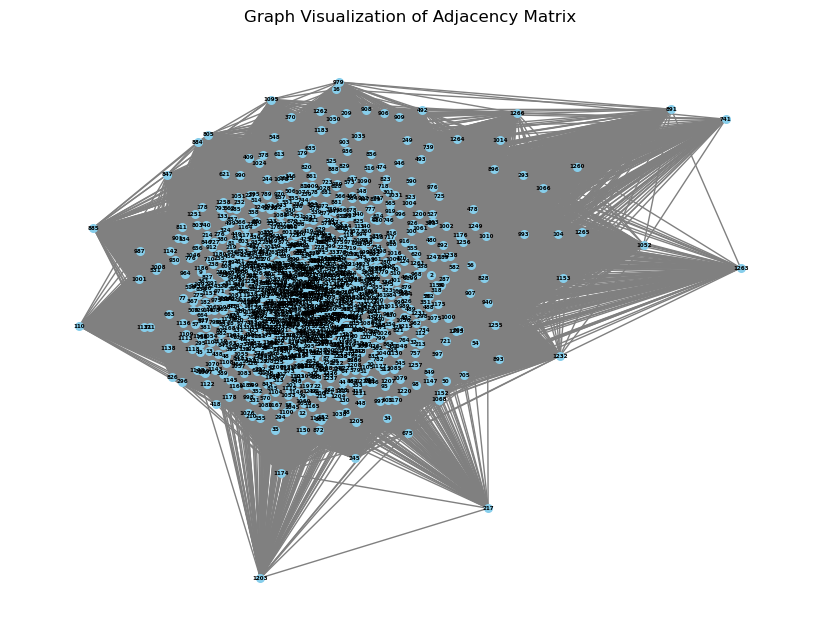

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.from_scipy_sparse_array(adjacency_matrix)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=30, node_color="skyblue", font_size=4, font_weight="bold", edge_color="gray")
plt.title("Graph Visualization of Adjacency Matrix")
plt.show()


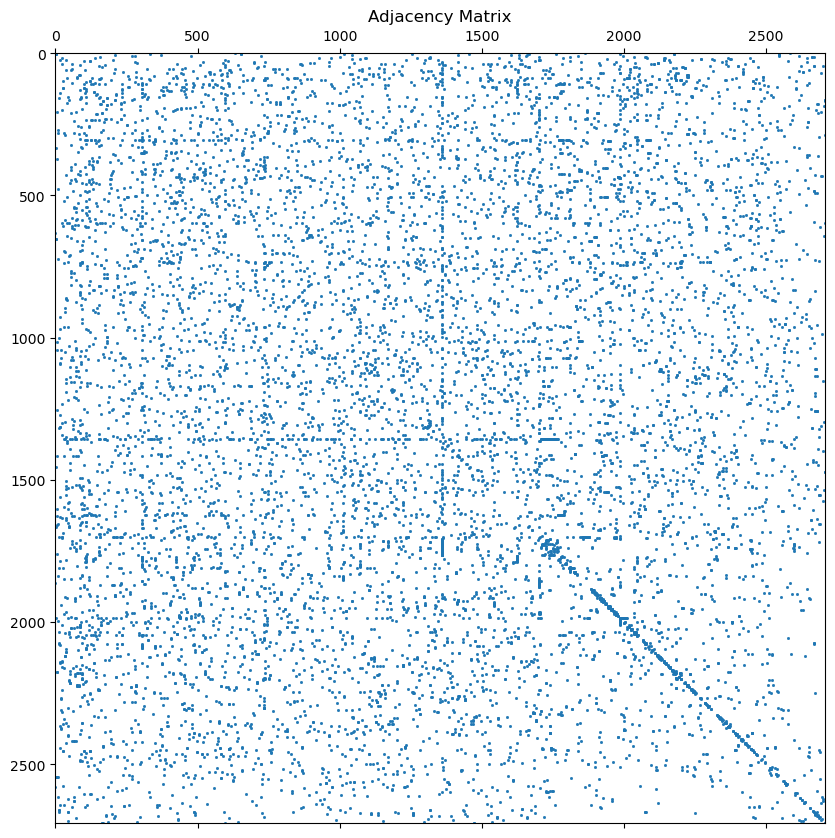

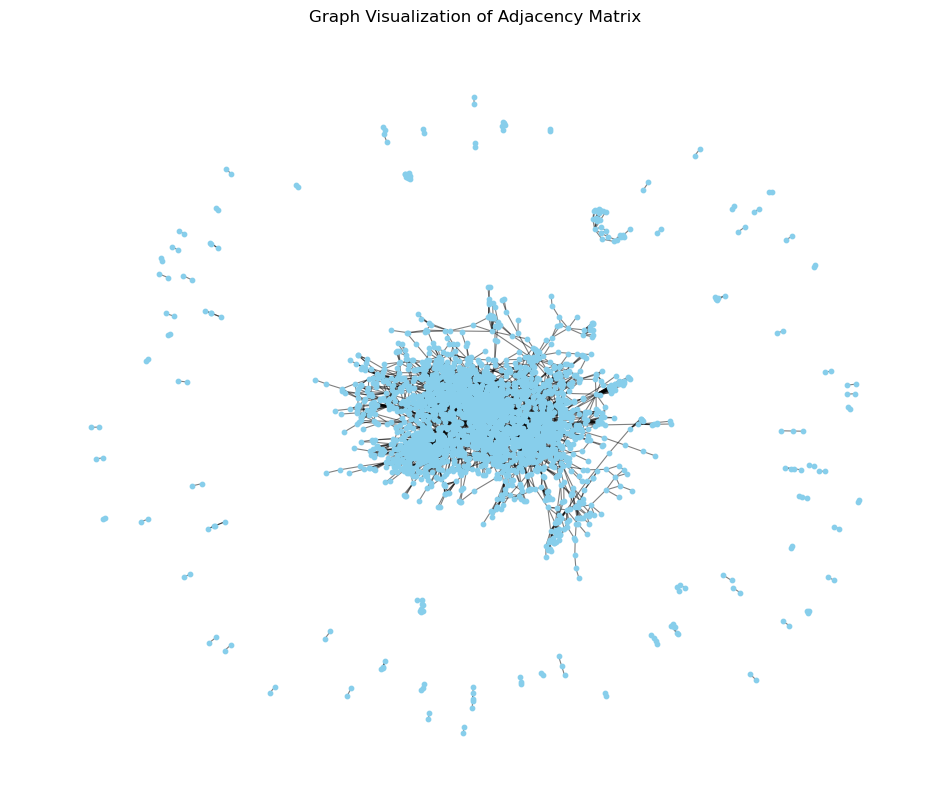

In [19]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

# Load the npz file
npz_file_path = '/home/dan/DMon/graph_embedding/dmon/data/cora.npz'
data = np.load(npz_file_path)

# Extract the adjacency matrix
adj_data = data['adj_data']
adj_indices = data['adj_indices']
adj_indptr = data['adj_indptr']
adj_shape = data['adj_shape']

adjacency_matrix = sp.csr_matrix((adj_data, adj_indices, adj_indptr), shape=adj_shape)

# Convert the sparse matrix to a dense format for plotting
dense_matrix = adjacency_matrix.todense()

# Plot the adjacency matrix
plt.figure(figsize=(10, 10))
plt.spy(dense_matrix, markersize=1)
plt.title("Adjacency Matrix")
plt.show()

G = nx.from_scipy_sparse_array(adjacency_matrix)

# Plot the graph
plt.figure(figsize=(12, 10))  # Increased figure size for better visibility
pos = nx.spring_layout(G)
edges = nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="black", width=0.8)
nodes = nx.draw_networkx_nodes(G, pos, node_size=10, node_color="skyblue")
# labels = nx.draw_networkx_labels(G, pos, font_size=4, font_weight="bold")

plt.title("Graph Visualization of Adjacency Matrix")
plt.axis('off')
plt.show()
